# Expectation vs. Sample

In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
# for figure 8.7, run a simulation of 2 * @b steps
def b_steps(b):
    # set the value of the next b states
    # it is not clear how to set this
    distribution = np.random.randn(b)

    # true value of the current state
    true_v = np.mean(distribution)

    samples = []
    errors = []

    # sample 2b steps
    for t in range(2 * b):
        v = np.random.choice(distribution)
        samples.append(v)
        errors.append(np.abs(np.mean(samples) - true_v))

    return errors

100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


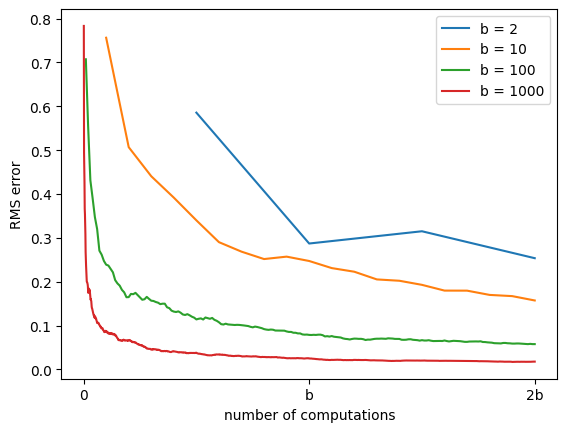

In [3]:
def figure_8_7():
    runs = 100
    branch = [2, 10, 100, 1000]
    for b in branch:
        errors = np.zeros((runs, 2 * b))
        for r in tqdm(np.arange(runs)):
            errors[r] = b_steps(b)
        errors = errors.mean(axis=0)
        x_axis = (np.arange(len(errors)) + 1) / float(b)
        plt.plot(x_axis, errors, label='b = %d' % (b))

    plt.xlabel('number of computations')
    plt.xticks([0, 1.0, 2.0], ['0', 'b', '2b'])
    plt.ylabel('RMS error')
    plt.legend()

    plt.show()

figure_8_7()